# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Loading Data

In [2]:
df = pd.read_csv(r"C:\Users\vinti\Downloads\final_capstone.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# Checking Data types and Column details

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# Checking for null values

In [4]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**Null values:** We couldn't find any null values from above dataset.

# Using Sweetviz vizualisation module to understand the data distribution and details

In [5]:
report = sv.analyze(df)
report.show_html("Credit_Score_EDA_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report Credit_Score_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Encoding Credit_Mix

In [33]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

# Get unique values from Credit_Score

In [31]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

# Encoding Credit_Score

In [32]:
df["Credit_Score"] = df["Credit_Score"].map({"Standard": 1, 
                               "Good": 2, 
                               "Poor": 0})

# Visualizing Data

[Text(0.5, 1.0, 'Credit Scores Based on Occupation')]

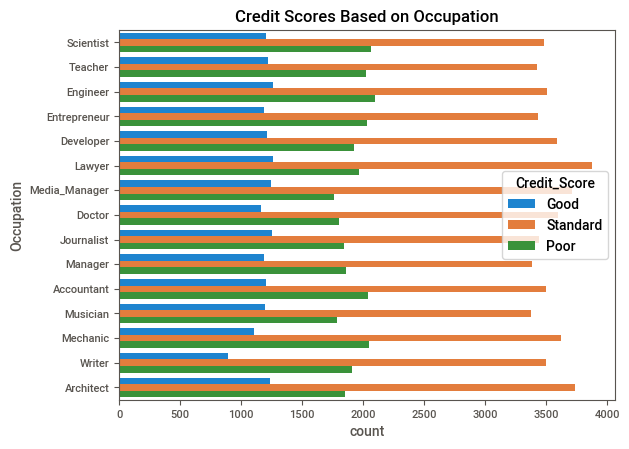

In [6]:
sb.countplot(y='Occupation', hue='Credit_Score', data=df).set(title="Credit Scores Based on Occupation")

The first thing we note from the above bar chart is that the most valuable consumers are engineers, lawyers, journalists, and architects.

[Text(0.5, 1.0, 'Credit Scores Based on Annual Income')]

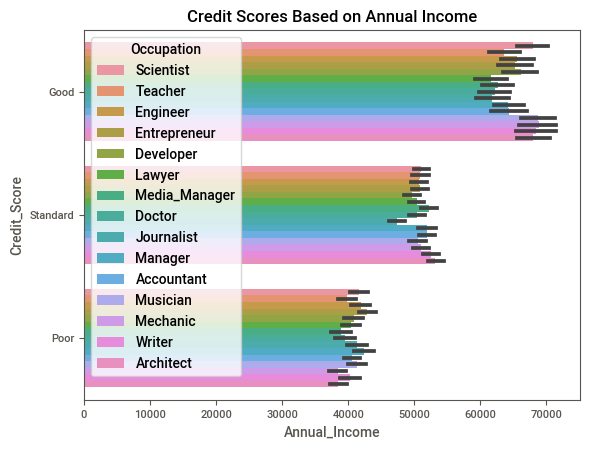

In [7]:
sb.barplot(x='Annual_Income', y='Credit_Score',hue='Occupation', data=df).set(title="Credit Scores Based on Annual Income")

Annual income and credit score have a positive linear relationship. More income equals a better credit score.(Income>60000)

[Text(0.5, 1.0, 'Credit Scores Based on Age')]

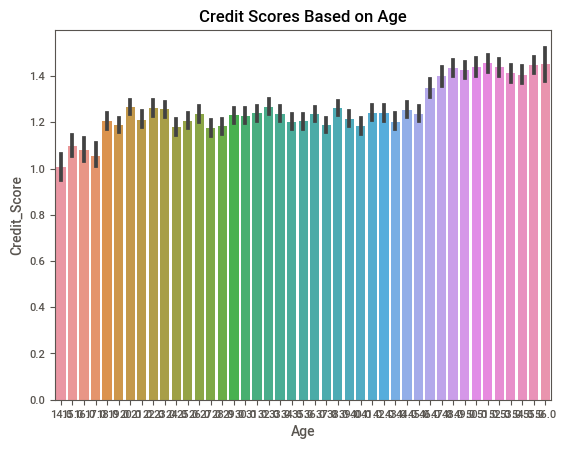

In [65]:
sb.barplot(x='Age', y='Credit_Score', data=df).set(title="Credit Scores Based on Age")

Credit score and age have a positive linear relationship. The credit score of older folks is higher.(Age>44)

[Text(0.5, 1.0, 'Credit Scores Based on Credit_Mix')]

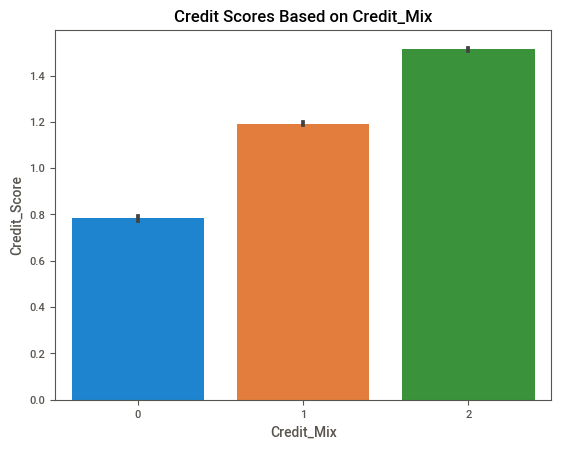

In [66]:
sb.barplot(x='Credit_Mix', y='Credit_Score', data=df).set(title="Credit Scores Based on Credit_Mix")

Credit mix and credit score have a positive linear relationship.(Credit ratio = 2)

[Text(0.5, 1.0, 'Credit Scores Based on Monthly Inhand Salary')]

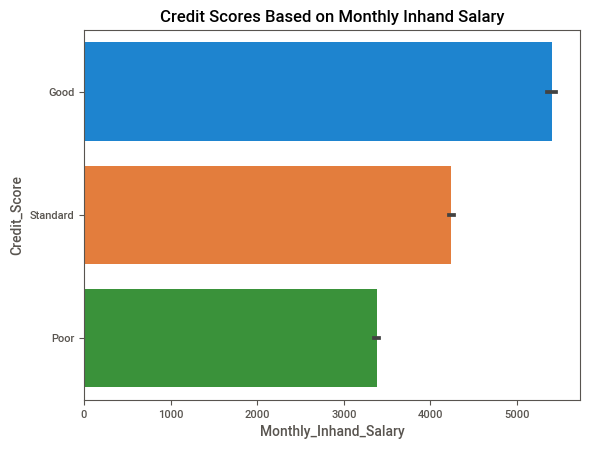

In [8]:
sb.barplot(x='Monthly_Inhand_Salary', y='Credit_Score', data=df).set(title="Credit Scores Based on Monthly Inhand Salary")

Monthly take-home pay has a positive linear relationship with credit score.(Monthly pay greater than 5,000)

[Text(0.5, 1.0, 'Credit Scores Based on Number of Bank Accounts')]

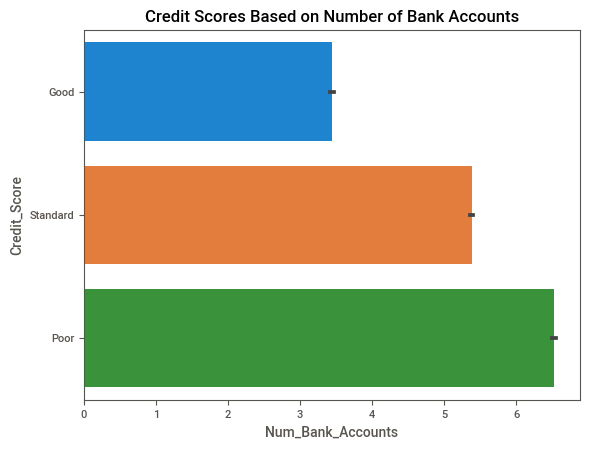

In [9]:
sb.barplot(x='Num_Bank_Accounts', y='Credit_Score', data=df).set(title="Credit Scores Based on Number of Bank Accounts")

The number of bank accounts has an inverse relationship with credit score. The optimal number of bank accounts is less than four.

[Text(0.5, 1.0, 'Credit Scores Based on Number of credit cards')]

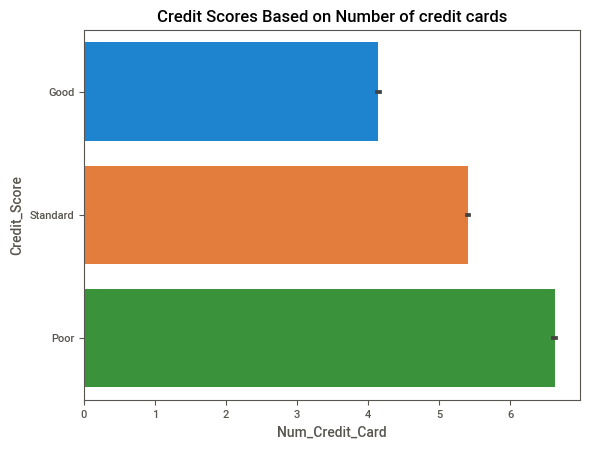

In [10]:
sb.barplot(x='Num_Credit_Card', y='Credit_Score', data=df).set(title="Credit Scores Based on Number of credit cards")

The number of credit cards has an inverse relationship with credit score. The ideal number of credit cards is less than four.

[Text(0.5, 1.0, 'Credit Scores Based on Interest_Rate')]

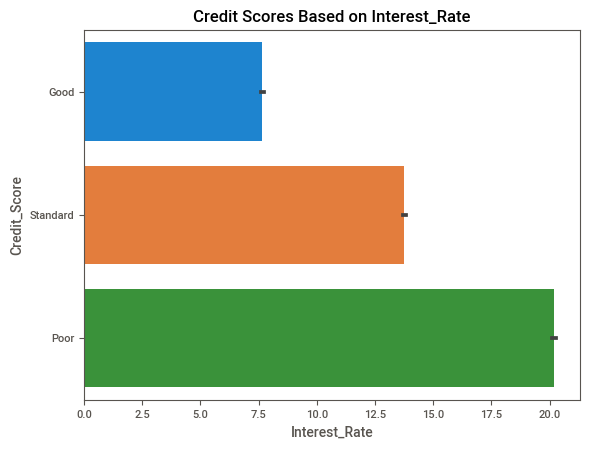

In [11]:
sb.barplot(x='Interest_Rate', y='Credit_Score', data=df).set(title="Credit Scores Based on Interest_Rate")

The relationship between interest rate and credit score is inverse. The best interest rate is less than 7%.

[Text(0.5, 1.0, 'Credit Scores Based on Number of loan taken by Person')]

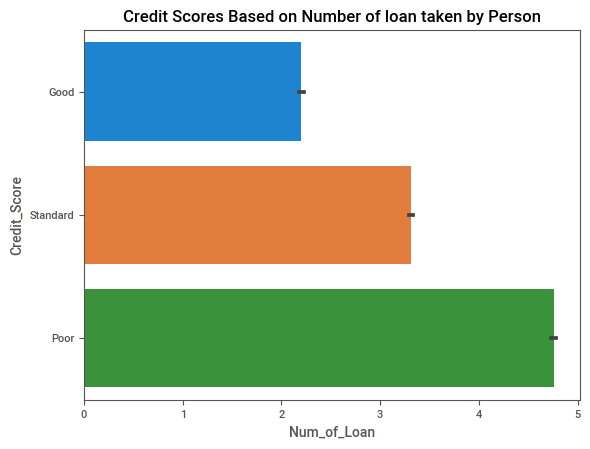

In [12]:
sb.barplot(x='Num_of_Loan', y='Credit_Score', data=df).set(title="Credit Scores Based on Number of loan taken by Person")

The number of loans has an inverse relationship with credit score. The ideal loan count is less than three.

[Text(0.5, 1.0, 'Credit Scores Based on Delay from due date')]

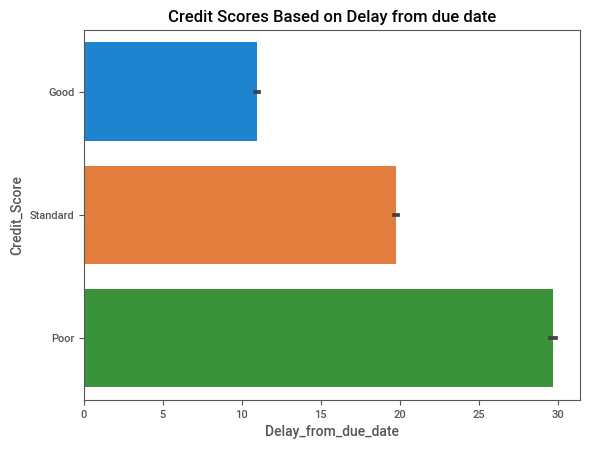

In [13]:
sb.barplot(x='Delay_from_due_date', y='Credit_Score', data=df).set(title="Credit Scores Based on Delay from due date")

Delay from the due date has an inverse linear relationship with credit score. The ideal delayed due date is fewer than ten days.

[Text(0.5, 1.0, 'Credit Scores Based on Number of Delayed Payment')]

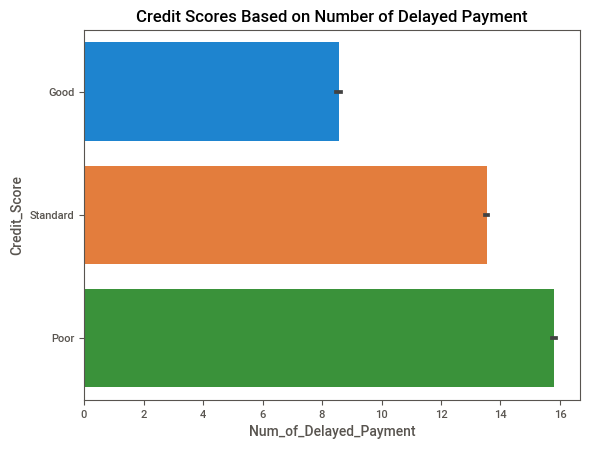

In [14]:
sb.barplot(x='Num_of_Delayed_Payment', y='Credit_Score', data=df).set(title="Credit Scores Based on Number of Delayed Payment")

The number of late payments has an inverse relationship with credit score. The optimal number of past-due payments is less than eight.

[Text(0.5, 1.0, 'Credit Scores Based on Outstanding_Debt')]

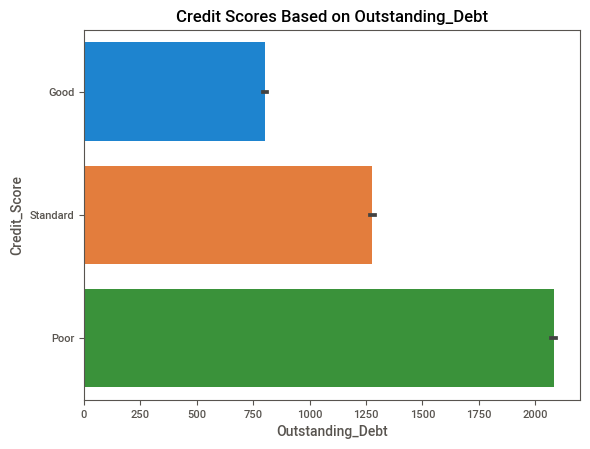

In [15]:
sb.barplot(x='Outstanding_Debt', y='Credit_Score', data=df).set(title="Credit Scores Based on Outstanding_Debt")

Outstanding debt has an inverse relationship with credit score. The ideal quantity owed is less than 750.

[Text(0.5, 1.0, 'Credit Scores Based on Credit Utilization Ratio')]

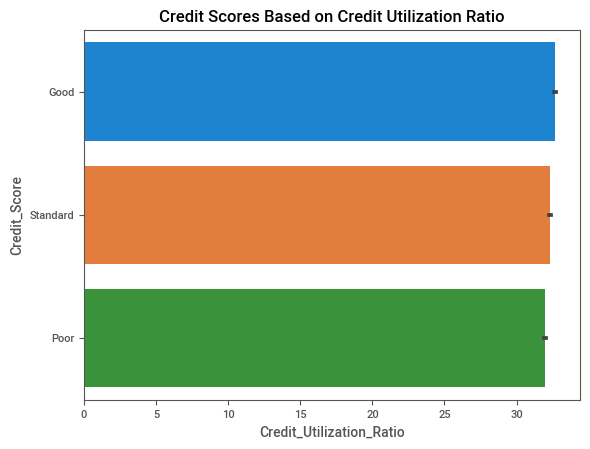

In [16]:
sb.barplot(x='Credit_Utilization_Ratio', y='Credit_Score', data=df).set(title="Credit Scores Based on Credit Utilization Ratio")

We found no significant relationship between credit use ratio and credit score. As a result, we can exclude it from our feature group when creating models.

[Text(0.5, 1.0, 'Credit Scores Based on Credit History Age')]

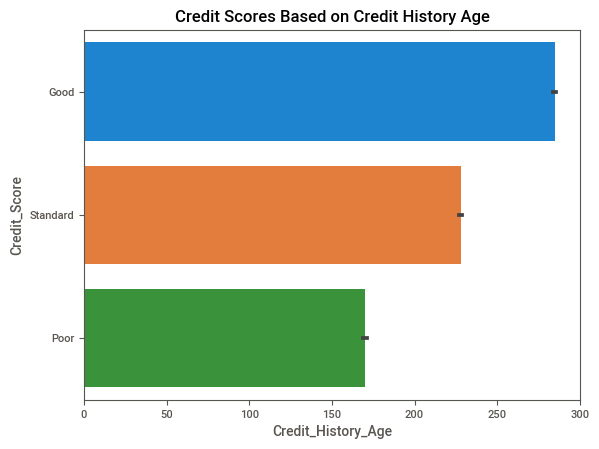

In [17]:
sb.barplot(x='Credit_History_Age', y='Credit_Score', data=df).set(title="Credit Scores Based on Credit History Age")

The age of credit history has a positive linear relationship with credit score. The ideal credit history age is larger than 270.

In [20]:
# Feature selection

In [133]:
selected_features = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                     'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Score','Credit_Mix','Monthly_Inhand_Salary', 'Credit_History_Age']

In [23]:
# Select relevant features

In [134]:
df_selected = df[selected_features]

In [ ]:
# Correlation_matrix

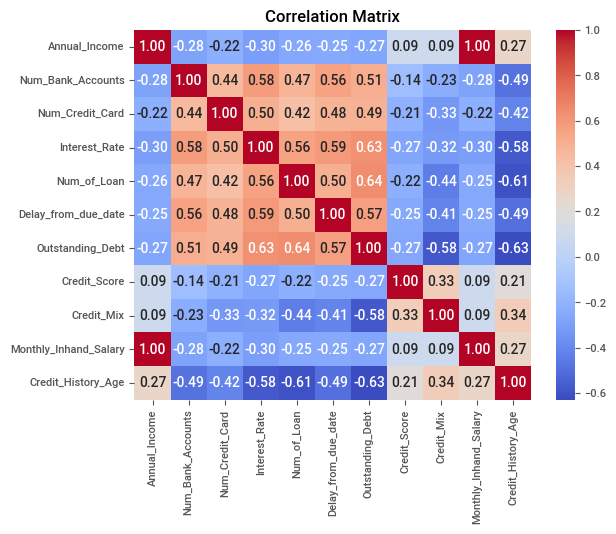

In [123]:
correlation_matrix = df_selected.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The accompanying graphic clearly shows the association between the selected features.

# Customer Segmentation (Clustering)

In [136]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_selected)

C:\Users\vinti\AppData\Local\Temp\ipykernel_19960\1887276939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_selected)


# Visualize the customer segmentation with a help of seaborn visualisation module

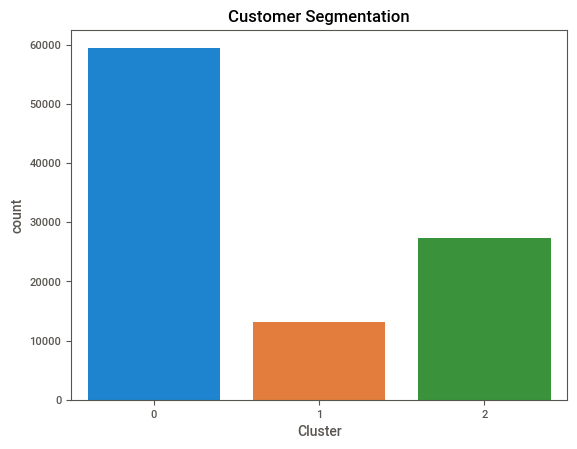

In [125]:
sb.countplot(x='Cluster', data=df_selected)
plt.title('Customer Segmentation')
plt.show()

From the above plot we only have ~27000 people to sale our product. Nearly 13000 people needs little bit relaxation from the ordinary plan. Remaining people dont have possibility to use this product.

# Credit Risk Assessment (Classification)

In [126]:
X_classification = df_selected.drop(['Credit_Score', 'Cluster'], axis=1)
y_classification = df_selected['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("TEST_DATA_for_Risk_Assessment\n")
print(X_test.head())
print()
print("TEST_EXPECTED_RESULT_for_Risk_Assessment\n")
print(y_test.head())
print()
print("TEST_PREDICTED_RESULT_for_Risk_Assessment\n")
print(y_pred[:5])

TEST_DATA_for_Risk_Assessment

       Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
75721       43391.96                1.0              5.0           10.0   
80184       14351.21                8.0              7.0           18.0   
19864      130125.04                5.0              2.0           11.0   
76699       20107.21                6.0              6.0           32.0   
92991       92186.19                1.0              2.0           12.0   

       Num_of_Loan  Delay_from_due_date  Outstanding_Debt  Credit_Mix  \
75721          0.0                  9.0           1468.28           1   
80184          6.0                 18.0           4766.87           0   
19864          2.0                  3.0           1195.05           1   
76699          2.0                 15.0           2544.60           2   
92991          4.0                  1.0            809.01           1   

       Monthly_Inhand_Salary  Credit_History_Age  
75721            3688.996667

# Accuracy score for Credit Risk Assessment (classification)

In [130]:
accuracy_score(y_test, y_pred)

0.82365

# Performance evaluation for Credit Risk Assessment (classification)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
classification_report_result

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.82      5874\n           1       0.80      0.80      0.80      3527\n           2       0.84      0.83      0.83     10599\n\n    accuracy                           0.82     20000\n   macro avg       0.82      0.82      0.82     20000\nweighted avg       0.82      0.82      0.82     20000\n'

# Performance Prediction (Regression)

In [137]:
X_regression = df_selected.drop(['Credit_Score', 'Cluster'], axis=1)
y_regression = df_selected['Credit_Score']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

print("TEST_DATA_for_Performance_Prediction\n")
print(X_test_reg.head())
print()
print("TEST_EXPECTED_RESULT_for_Performance_Prediction\n")
print(y_test_reg.head())
print()
print("TEST_PREDICTED_RESULT_for_Performance_Prediction\n")
print(y_pred_reg[:5])

TEST_DATA_for_Performance_Prediction

        Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
75721  30.0       43391.96                1.0              5.0           10.0   
80184  18.0       14351.21                8.0              7.0           18.0   
19864  41.0      130125.04                5.0              2.0           11.0   
76699  35.0       20107.21                6.0              6.0           32.0   
92991  27.0       92186.19                1.0              2.0           12.0   

       Num_of_Loan  Delay_from_due_date  Outstanding_Debt  Credit_Mix  \
75721          0.0                  9.0           1468.28           1   
80184          6.0                 18.0           4766.87           0   
19864          2.0                  3.0           1195.05           1   
76699          2.0                 15.0           2544.60           2   
92991          4.0                  1.0            809.01           1   

       Monthly_Inhand_Salary  Credit

# Performance evaluation for Performance Prediction (regression)

In [138]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
mse

0.36057133557589993